In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

In [5]:
google = pd.read_csv('googleplaystore.csv')
google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [7]:
apple = pd.read_csv('AppleStore.csv')
apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [14]:
Google = google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [15]:
Apple = apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


In [17]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [19]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [21]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [23]:
Google[Google['Price']=='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [28]:
Google = Google[Google['Price']!= 'Everyone']
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [31]:
nosymb = Google['Price'].str.replace('$', ' ')

/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_68584/72266601.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nosymb = Google['Price'].str.replace('$', ' ')


In [33]:
Google["Price"] = pd.to_numeric(nosymb)

In [35]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [39]:
Google['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [41]:
Google["Reviews"] = pd.to_numeric(Google["Reviews"])

In [43]:
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

In [45]:
Apple['platform']= 'apple'
Google['platform']= 'google'

/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_68584/3125316957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple['platform']= 'apple'


In [47]:
Apple.head()

,prime_genre,user_rating,rating_count_tot,price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


In [49]:
old_names = Apple.columns
new_names = Google.columns

In [51]:
print(old_names)

Index(['prime_genre', 'user_rating', 'rating_count_tot', 'price', 'platform'], dtype='object')


In [54]:
Apple = Apple.rename(columns = dict(zip(old_names, new_names)))

In [56]:
Apple.head()

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


In [61]:
df = Apple.append(Google, ignore_index=True)
df.head()

/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_68584/391175156.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = Apple.append(Google, ignore_index=True)


,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


In [63]:
df.sample(12)

,Category,Rating,Reviews,Price,platform
484,Photo & Video,4.5,2377,0.99,apple
7331,BEAUTY,NaN,30,0.00,google
3446,Games,4.5,452,4.99,apple
3158,Entertainment,2.5,9,0.99,apple
17929,PERSONALIZATION,3.5,178,0.00,google
13158,FAMILY,4.4,31,0.99,google
10649,PRODUCTIVITY,4.3,3016297,0.00,google
9827,SOCIAL,4.2,1259894,0.00,google
2334,Games,0.0,0,0.99,apple
6989,Sports,3.5,33,0.99,apple


In [65]:
print(df.shape)

(18037, 5)


In [68]:
df = df.dropna()
print(df.shape)

(16563, 5)


In [70]:
df[df['Reviews']==0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

In [73]:
df = df[df['Reviews']!= 0]

In [75]:
df.groupby(by = 'platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


<Axes: title={'center': 'Rating'}, xlabel='platform'>

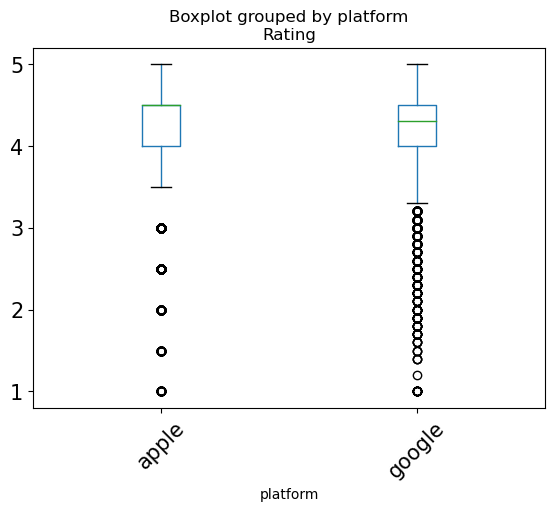

In [77]:
df.boxplot(by = 'platform', column = ['Rating'], grid = False, rot =45, fontsize = 15)

In [80]:
apple = df[df['platform']=='apple']['Rating']
google = df[df['platform']=='google']["Rating"]
apple.head()

0    4.0
1    4.0
2    3.5
3    4.0
4    4.5
Name: Rating, dtype: float64

In [82]:
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [84]:
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


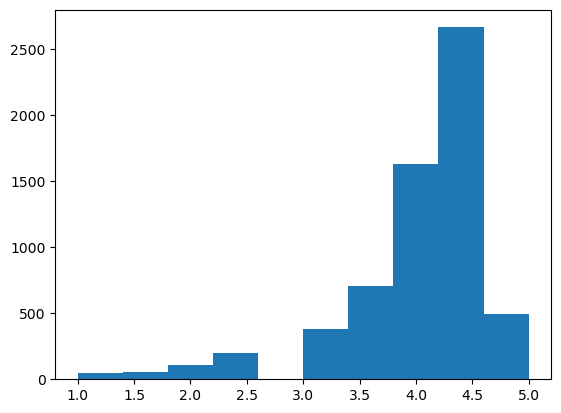

In [86]:
histoApple = plt.hist(apple)

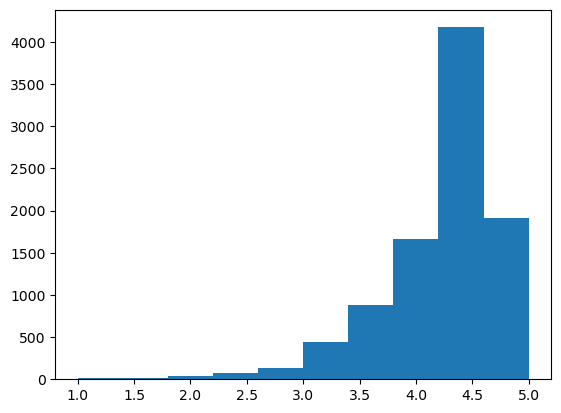

In [88]:
histoGoogle = plt.hist(google)

In [90]:
df['Permutation1'] = np.random.permutation(df['Rating'])

In [92]:
df.groupby(by = 'platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.124809,0.614805,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.141490,0.611652,1.0,4.0,4.3,4.5,5.0


In [95]:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [97]:
difference = list()

In [99]:
for _ in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform']=='apple'])- np.mean(permutation[df['platform']=='google']))

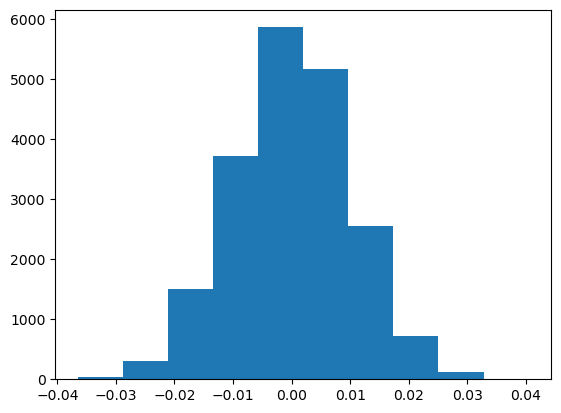

In [101]:
histo = plt.hist(difference)

In [104]:
obs_difference = np.mean(apple) - np.mean(google)
obs_difference = abs(obs_difference)
print(obs_difference)

0.1420605474512291


In [106]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i]>= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i]<= -obs_difference):
        negativeExtremes.append(difference[i])

In [108]:
print(len(positiveExtremes))

0


In [110]:
print(len(negativeExtremes))

0


In [ ]:
#Since there were no differences as large as our observed differences
#We reject the Null hypothesis and advise our client to integrate
#only Google Play into their operating system interface.